In [1]:
!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [9]:
from utils import *

In [10]:
data = preprocessdata_yf("SBIN.NS")

[*********************100%%**********************]  1 of 1 completed


In [11]:
data

,open,high,low,close,volume
time,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039
...,...,...,...,...,...
2023-12-26,638.849976,641.299988,635.650024,638.049988,10153089
2023-12-27,640.750000,649.450012,639.000000,648.549988,14417646
2023-12-28,650.250000,653.299988,646.500000,651.400024,16982092


In [12]:
data["breakout_high"] = data["high"].rolling(4).max().shift(1)
data["breakout_low"] = data["low"].rolling(4).min().shift(1)

<Axes: xlabel='time'>

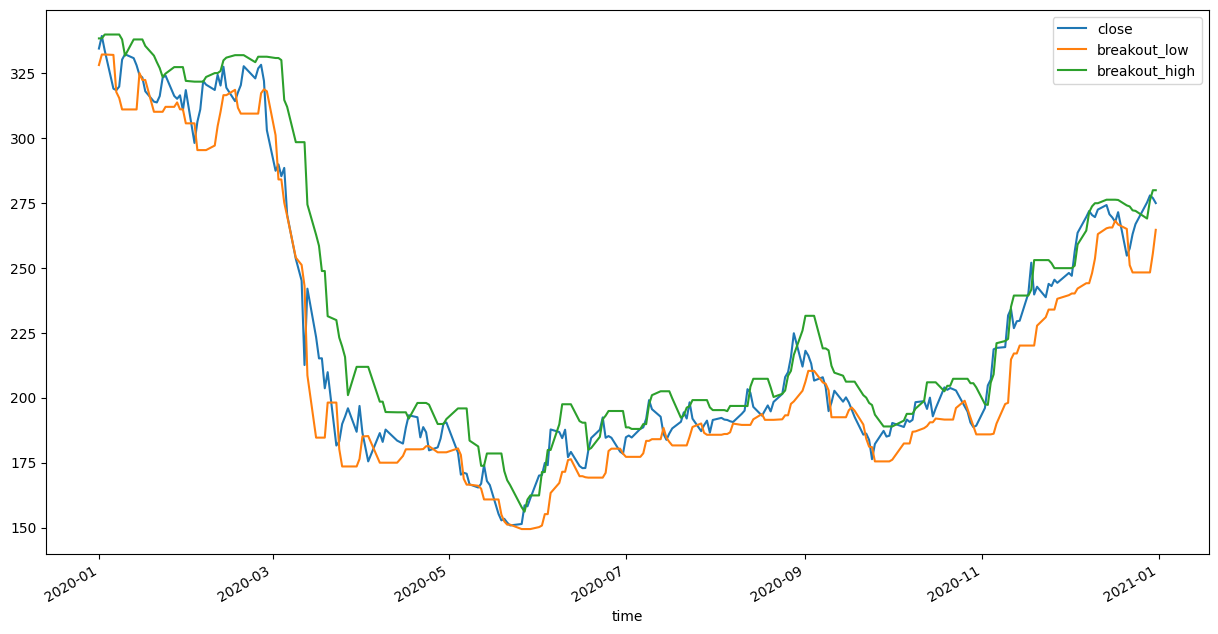

In [13]:
data[["close", "breakout_low", "breakout_high"]].loc["2020"].plot(figsize=(15,8))

In [26]:
data["signal"] = np.nan

condition_buy = data["close"] < data["breakout_low"]
condition_sell = data["breakout_high"] < data["close"]
data.loc[condition_buy, "signal"] = -1
data.loc[condition_sell, "signal"] = 1

In [27]:
data

,open,high,low,close,volume,breakout_high,breakout_low,signal,position,cost,pct,return
time,,,,,,,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280,NaN,NaN,NaN,NaN,0.0000,-0.031830,NaN
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318,NaN,NaN,NaN,NaN,0.0000,-0.026663,NaN
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880,NaN,NaN,NaN,NaN,0.0000,-0.003457,NaN
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039,18.978922,17.223972,NaN,NaN,0.0000,-0.005604,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,638.849976,641.299988,635.650024,638.049988,10153089,660.400024,627.500000,NaN,-1.0,0.0000,0.002042,-0.204160
2023-12-27,640.750000,649.450012,639.000000,648.549988,14417646,660.400024,627.500000,NaN,-1.0,0.0000,0.016456,-1.645639
2023-12-28,650.250000,653.299988,646.500000,651.400024,16982092,649.450012,627.500000,1.0,-1.0,0.0001,0.004394,-0.449447


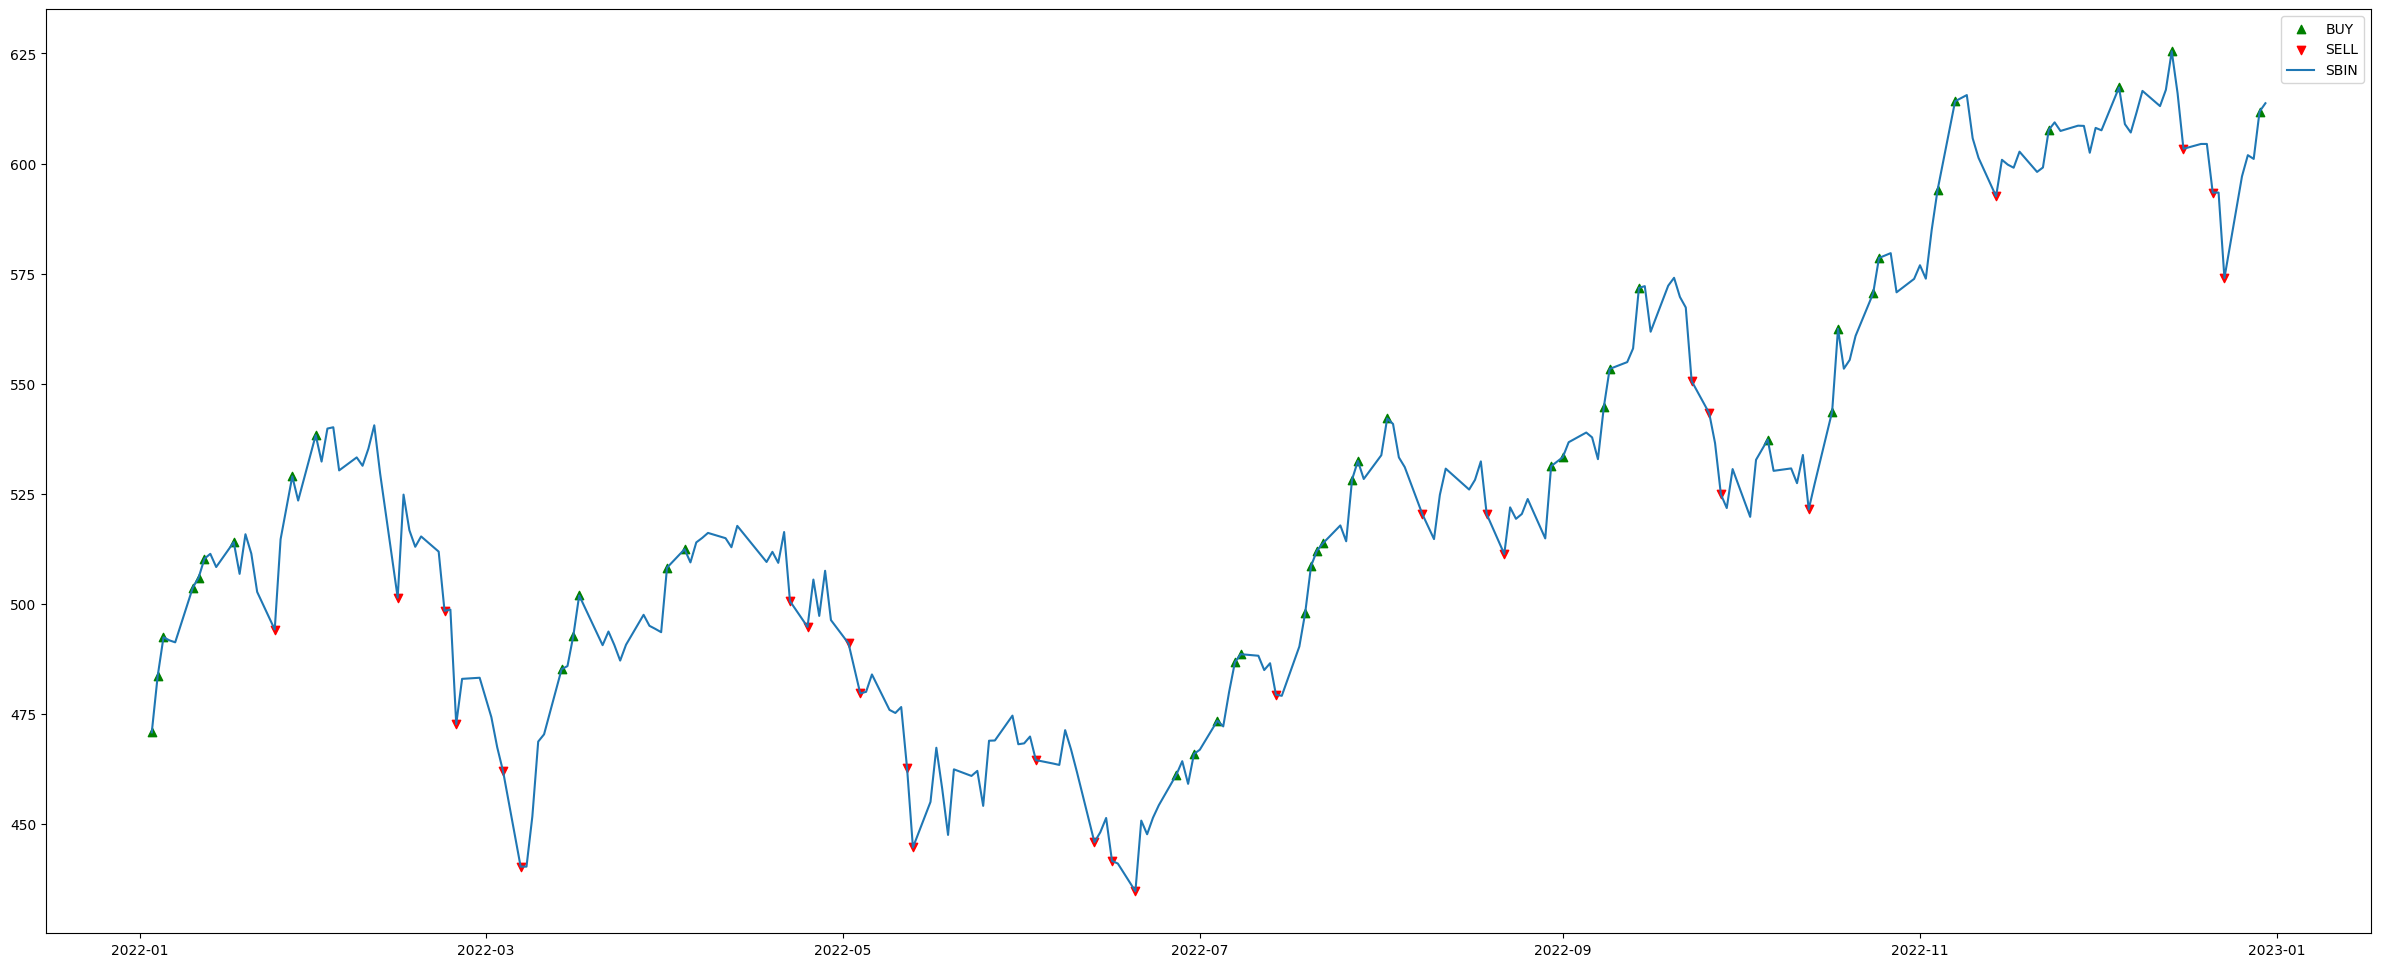

In [28]:
from turtle import color


year = "2022"

idx_open = data.loc[data["signal"] == 1].loc[year].index
idx_close = data.loc[data["signal"] == -1].loc[year].index

plt.figure(figsize=(30,12))

plt.scatter(idx_open, data.loc[idx_open]["close"].loc[year], color= "green", marker="^")
plt.scatter(idx_close, data.loc[idx_close]["close"].loc[year], color= "red", marker="v")

plt.plot(data["close"].loc[year].index, data["close"].loc[year])

plt.legend(["BUY", "SELL", "SBIN"])
plt.show()

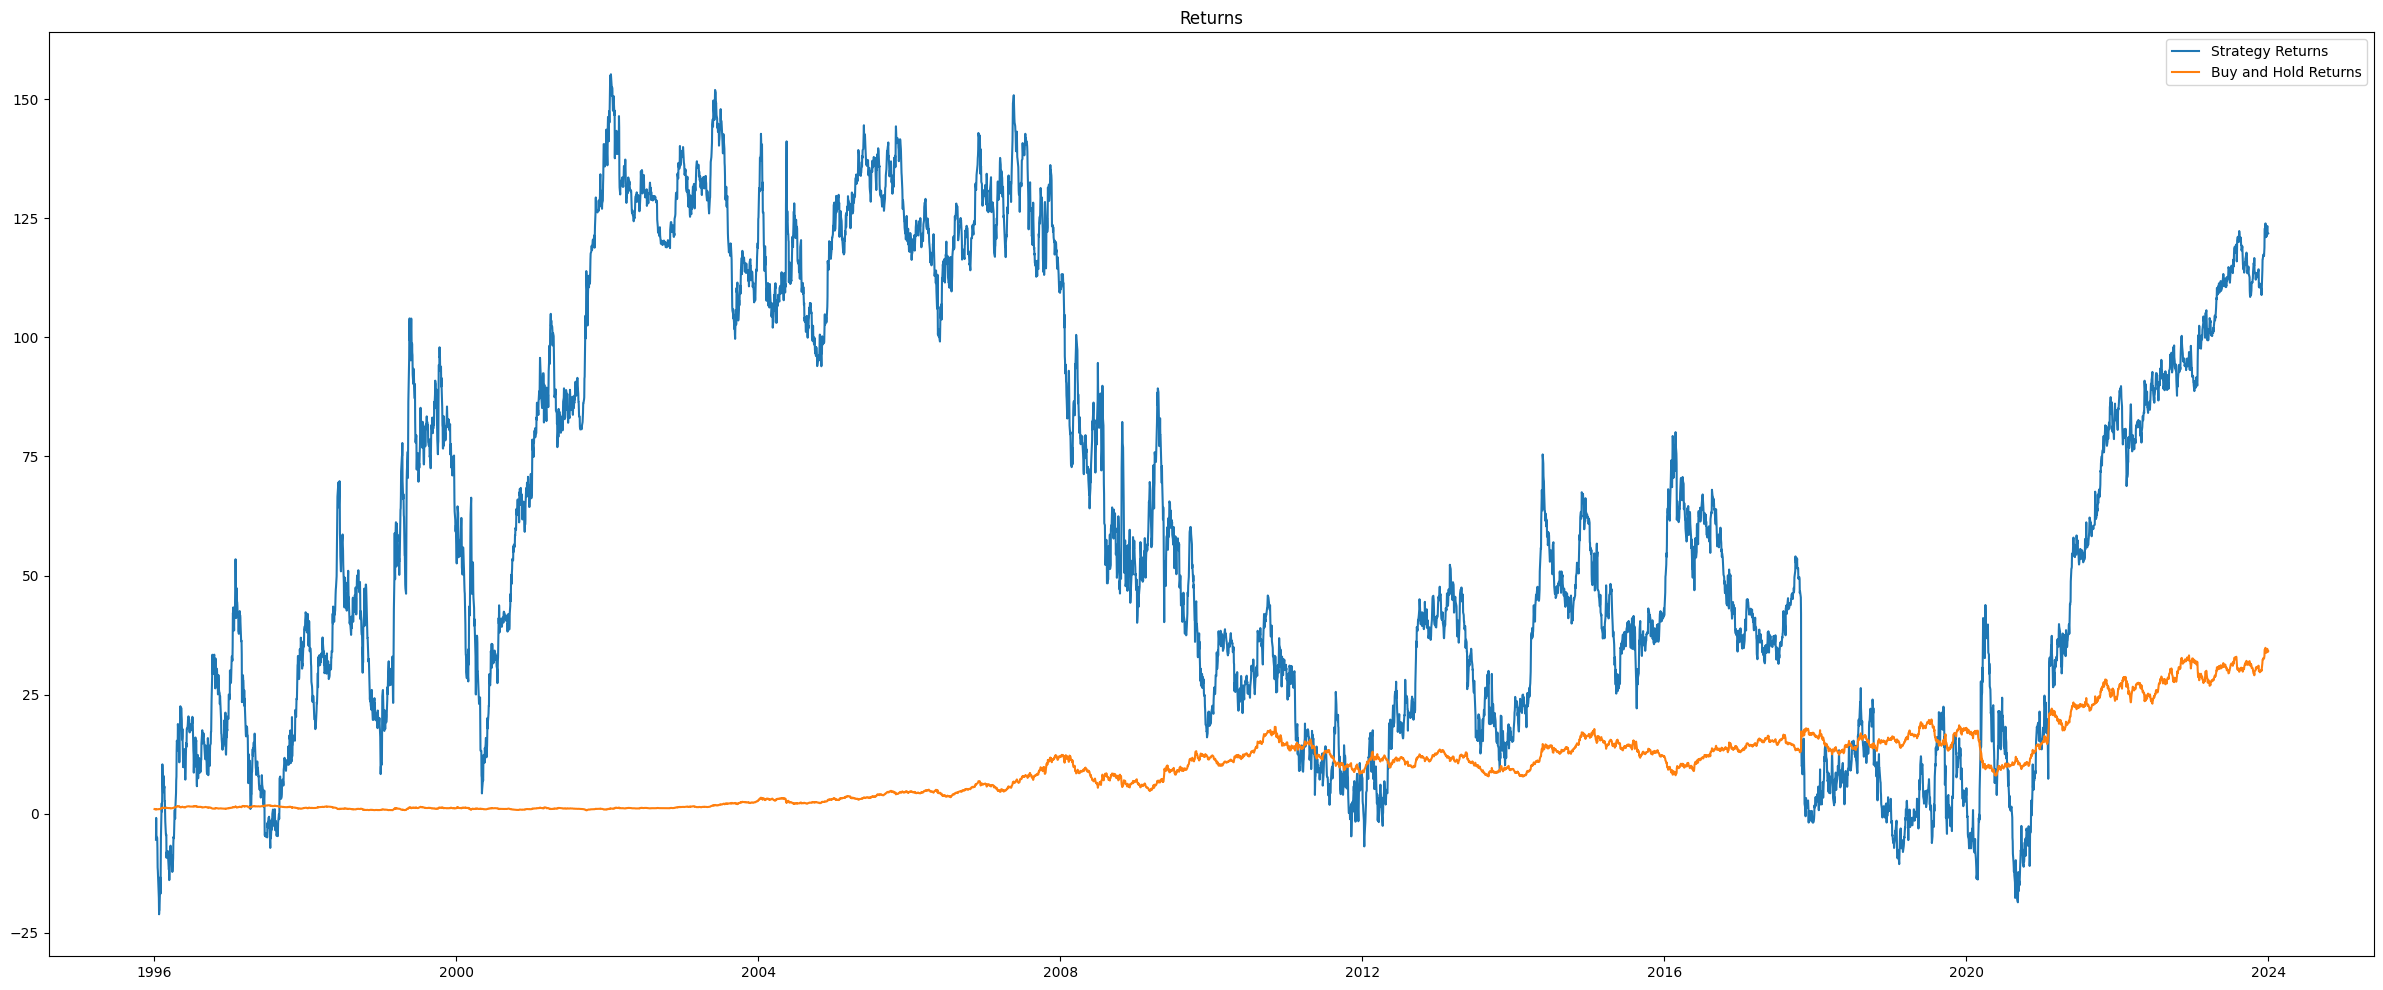

In [34]:
data["position"] = data["signal"].fillna(method="ffill")

cost_ind = 0.0001

data["cost"] = (np.abs(data["signal"]) * cost_ind).fillna(value=0)

data["pct"] = data["close"].pct_change(1)

data["return"] = (data["pct"] * data["position"].shift(1) - data["cost"]) * 100

data['Daily_Returns'] = data['close'].pct_change()

data['Buy_and_Hold_Returns'] = (1 + data['Daily_Returns']).cumprod()
fig, ax = plt.subplots(figsize=(30, 12))

ax.plot(data.index, data["return"].cumsum(), label='Strategy Returns', linestyle='-')
ax.plot(data.index, data['Buy_and_Hold_Returns'], label='Buy and Hold Returns', linestyle='-')

ax.set_title("Returns")
ax.legend()
plt.show()

plt.show()